# Automatidata project ( The Power of Statistics)

You are a data professional in a data consulting firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test.

# Data dictionary

This project uses a dataset called 2017_Yellow_Taxi_Trip_Data.csv. It data gathered by the New York City Taxi & Limousine Commission and published by the city of New York as part of their NYC Open Data program. In order to improve the learning experience and shorten runtimes, a sample was drawn from the 113 million rows in the 2017 Yellow Taxi Trip Data table.

The dataset contains:

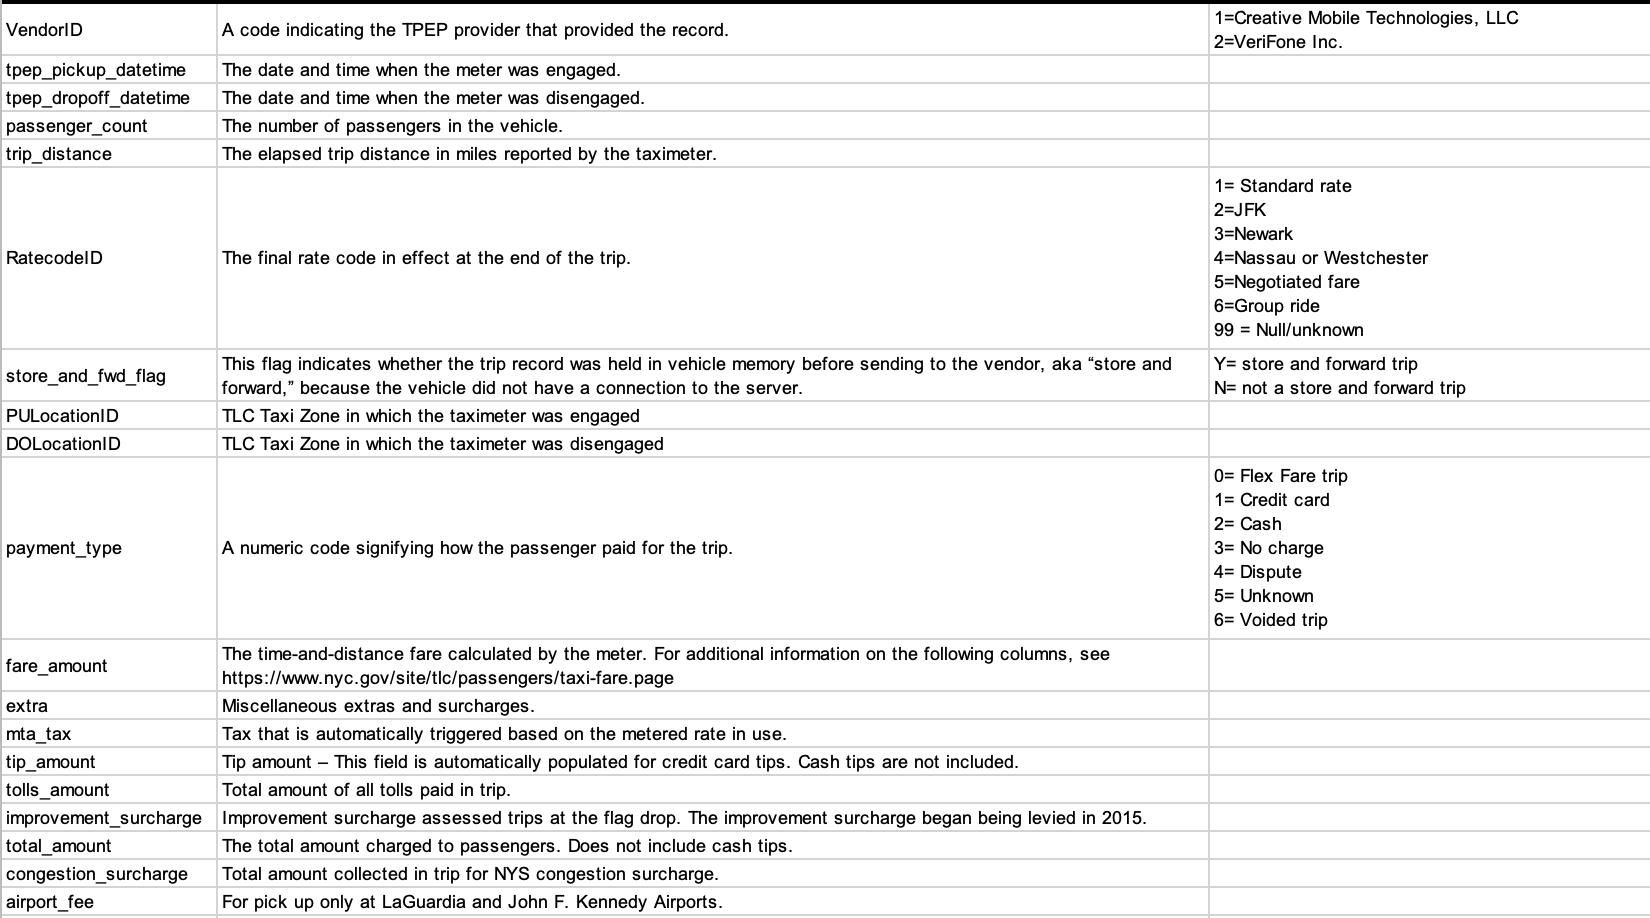

# Statistical analysis

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as descriptive statistics and hypothesis testing. You will explore the data provided and conduct A/B and hypothesis testing.


The purpose of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

Note: For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

The goal is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

This activity has four parts:

**Part 1:** `Imports and data loading`

What data packages will be necessary for hypothesis testing?

**Part 2:** `Conduct EDA and hypothesis testing`

How did computing descriptive statistics help you analyze your data?

How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** `Communicate insights with stakeholders`

What key business insight(s) emerged from your A/B test?

What business recommendations do you propose based on your results?

# **Conduct an A/B test**

<img src="Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

### Hint:
Before you begin, recall the following Python packages and functions that may be useful:

**Main functions:** stats.ttest_ind(a, b, equal_var)

**Other functions:** mean()

**Packages** pandas, stats.scipy

In [1]:
#==> ENTER YOUR CODE HERE
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Load dataset into dataframe
taxi_data = pd.read_csv('/Users/burhanudin/Study_burhanudin_6/Common_Data/2017_Yellow_Taxi_Trip_Data.csv', index_col = 0)
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


<img src="Analyze.png" width="100" height="100" align=left>

<img src="Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**

In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?

+ Secara umum, statistik deskriptif berguna karena memungkinkan Anda menjelajahi dan memahami data dalam jumlah besar dengan cepat. 

+ Dalam hal ini, menghitung statistik deskriptif membantu Anda dengan cepat membandingkan jumlah total tarif rata-rata di antara berbagai jenis pembayaran.

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

### Hint:
Refer back to Self Review Descriptive Statistics for this step-by-step proccess.

Note: In the dataset, payment_type is encoded in integers:

    1: Credit card
    2: Cash
    3: No charge
    4: Dispute
    5: Unknown

In [6]:
#==> ENTER YOUR CODE HERE
taxi_data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
VendorID,22699.0,NaN,NaN,NaN,1.556236,0.496838,1.0,1.0,2.0,2.0,2.0
tpep_pickup_datetime,22699,22687,07/03/2017 3:45:19 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_dropoff_datetime,22699,22688,10/18/2017 8:07:45 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,22699.0,NaN,NaN,NaN,1.642319,1.285231,0.0,1.0,1.0,2.0,6.0
trip_distance,22699.0,NaN,NaN,NaN,2.913313,3.653171,0.0,0.99,1.61,3.06,33.96
RatecodeID,22699.0,NaN,NaN,NaN,1.043394,0.708391,1.0,1.0,1.0,1.0,99.0
store_and_fwd_flag,22699,2,N,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULocationID,22699.0,NaN,NaN,NaN,162.412353,66.633373,1.0,114.0,162.0,233.0,265.0
DOLocationID,22699.0,NaN,NaN,NaN,161.527997,70.139691,1.0,112.0,162.0,233.0,265.0
payment_type,22699.0,NaN,NaN,NaN,1.336887,0.496211,1.0,1.0,1.0,2.0,4.0


+ Anda tertarik pada hubungan antara jenis pembayaran dan total jumlah tarif yang dibayar pelanggan. Salah satu pendekatannya adalah dengan melihat jumlah total tarif rata-rata untuk setiap jenis pembayaran.

In [4]:
#==> ENTER YOUR CODE HERE
taxi_data.groupby('payment_type')['total_amount'].mean()

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

Berdasarkan rata-rata yang ditampilkan, terlihat bahwa pelanggan yang membayar dengan kartu kredit cenderung membayar jumlah tarif total yang lebih besar dibandingkan pelanggan yang membayar secara tunai. Namun, perbedaan ini mungkin timbul karena pengambilan sampel secara acak, dan bukan karena perbedaan nyata dalam jumlah tarif total. Untuk menilai apakah perbedaannya signifikan secara statistik, Anda melakukan uji hipotesis.

### Task 3. Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider your hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [5]:
#==> ENTER YOUR CODE HERE
credit_card = taxi_data[taxi_data['payment_type']==1]['total_amount']
cash = taxi_data[taxi_data['payment_type']==2]['total_amount']
stats.ttest_ind(a=credit_card,b=cash,equal_var=False)

Ttest_indResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91)

<img src="Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4. Communicate insights with stakeholders

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?
2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

1. Wawasan bisnis utama adalah bahwa mendorong pelanggan untuk membayar dengan kartu kredit dapat menghasilkan lebih banyak pendapatan bagi pengemudi taksi. 

2. Proyek ini memerlukan asumsi bahwa penumpang terpaksa membayar dengan cara apa pun, dan setelah diberitahu tentang persyaratan ini, mereka selalu mematuhinya. Data tidak dikumpulkan dengan cara ini; jadi, asumsi harus dibuat untuk mengelompokkan entri data secara acak untuk mendapatkan nilai A